# Data Preparation and Visualization

## 2. Contribution report

After completing the assignment, please answer the following questions **as a group** by adding your answers within this markdown block.

1. In a few sentences, describe each group member's individual contributions to the submission. Be as specific as possible (e.g. coordinated group efforts, specific problems answered, specific problems reviewed/revised, sections of the submission written, etc.).


    Niriksha Sheth: Coordinated group efforts by dividng the tasks among the group memebers and documenting topics discussed after a zoom meeting with the group members. 
    Responsible for part 2 of the assignment which includes to write a query for the top performing dealerships and creating a visualization based on the dataframe created. Also responsible for the associated response in part 4. Provided assistance and expertise in creating visualization for part 3 as a group effort. 


2. In a few sentences, describe what was learned in completing this assignment. In particular, describe what was learned through the **specific individual contributions** mentioned above.
    
  Niriksha: I learned how to formulate a query based on what was required from my boss and was able to understand the big picture as well as the details required in pulling the right data from the database. I was able to apply the concept of Common Table Expressions and Window Functions taught in class to effectively calculate the cumulative sales in part 2. I also learned how to read a query and store the query in a python dataframe as well as how to display and manipulate the dataframe in python. The most interesting part of the assignment was to create visualizations using python libraries matplotlib and seaborn, which was quite challenging in the beginning but after several trial and errors, was able to produce a clean visualization for displaying the historical trend in cumulative sales over time by dealership states. I believe the most important takeaway from the visualization assignment is to identify which type of chart will work for what kind of data to best represent the output to my respective boss or the senior leadership team of a company. 

***

## 3. Assignment

### Instructions: 
You will be presented with a scenario and will need to utilize your SQL and python skills to complete this assignment successfully. 

Put this .ipynb file in the `jupyter_notebooks` folder in your Docker Compose directory.  Then you will be able to connect to the database and run your code without issue.

Each group will submit two files:
1. a single Jupyter Notebook (.ipynb).  **You must Run All cells before submitting.** This notebook should have all of the relevant visualizations and output displayed properly.  We will restart and run all of the code from this notebook, which should not produce any errors.
2. a PDF version (.pdf) of the Jupyter Notebook. This PDF should have all of the relevant visualizations and output displayed properly. 

In [1]:
#run this code first to connect to the database and verify the connection is working
## DO NOT MODIFY THIS CODE BLOCK
## If you have placed this notebook in the jupyter notebooks folder properly, 
## this block should return the first two rows of the customers table

from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="behappy",
    host="postgres",
    port=5432,
    database="sqlda"))

engine.execute("SELECT * FROM customers LIMIT 2;").fetchall()

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

## Scenario 

You are a team of extremely successful data scientists at a top motor dealership company. You need to create summary tables and visualizations that your boss will present at the next company shareholder meeting.  She has sent you the following e-mail describing what she needs.

***
From: importantboss@topmotordealershipcompany.com

To: datascienceteam@topmotordealershipcompany.com

Subject: Data request for shareholder meeting

We are planning to expand our services in states with the highest sales amounts.  For our next shareholder meeting, we need to provide more information about sales performance at the state level and possible reasons why sales are lower in some states.  Please send me information to address the following items for our next shareholder meeting along with your thoughts.

1. Sales performance at the state level (top 5 and bottom 5 states)
2. For the best performing states, which dealerships are performing well and how are they trending?
3. Is sales performance by state associated with the types of products sold (scooter vs. automobile)?

Thank you!

-Important Boss

***

Your team promptly comes up with the following plan.

## Part 1: Visualizing the top and bottom performing states

1. Write a SELECT query that returns the total sales amount for each state from January 1, 2017 to now.  The table should have two columns, `state` and `total_sales_amount`, with one row for each state ordered by `total_sales_amount` in *descending* order. Make sure that `total_sales_amount` is rounded appropriately.


2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_by_state`.


3. Display the rows in `sales_by_state` corresponding to the 5 states with the **largest** total sales amount in *descending* order.


4. Display the rows in `sales_by_state` corresponding to the 5 states with the **smallest** total sales amount in *ascending* order.


5. Visualize sales performance by state for the top and bottom performing states discovered in 1.3 and 1.4.  You can use more than one visualization.  These should be **presentation ready** (e.g. appropriate and complete titles and axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, etc.). 

Include the code needed for each component of part 1 in the appropriate code block below.

In [2]:
#1.1 select query
query_1 = """
select d.state, round(sum(s.sales_amount)) as total_sales_amount from sales s inner join dealerships d on s.dealership_id = d.dealership_id
where s.sales_transaction_date >= '2017-01-01'
group by d.state
order by total_sales_amount desc
"""

In [3]:
#1.2 create dataframe
sales_by_state = pd.read_sql_query(query_1,engine)

In [4]:
#1.3 display top 5 performing states
top_performing_states=sales_by_state.head(5)
top_performing_states

,state,total_sales_amount
0,TX,12690936.0
1,CA,10969372.0
2,IL,10420333.0
3,VA,8065776.0
4,NJ,7219212.0


In [5]:
#1.4 display bottom 5 performing states
bottom_performing_states=sales_by_state.tail(5)
bottom_performing_states

,state,total_sales_amount
10,AZ,2869986.0
11,PA,2199877.0
12,NV,1993748.0
13,MA,1827013.0
14,OR,966218.0


<AxesSubplot:xlabel='state'>

<AxesSubplot:xlabel='state'>

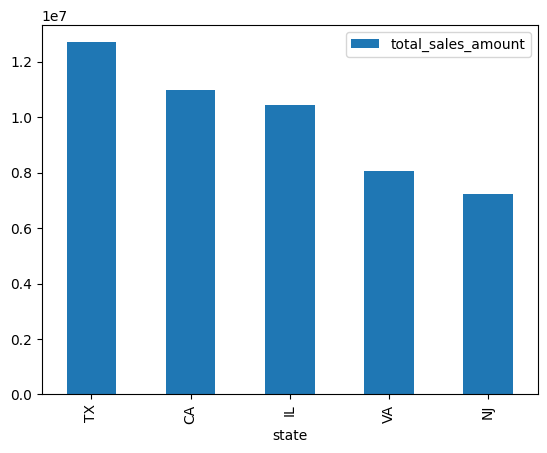

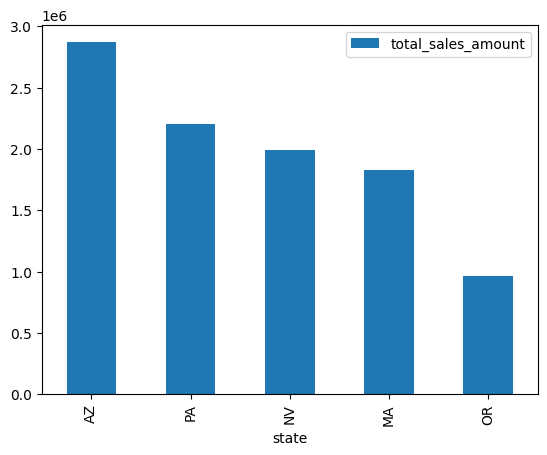

In [6]:
#1.5 visualize top and bottom performing states
top_performing_states.plot.bar('state',y='total_sales_amount')
bottom_performing_states.plot.bar('state',y='total_sales_amount')

## Part 2: Top performing dealerships

Create a table and visualization of historical cumulative sales amounts by dealership from January 1, 2017 to now.  Only include dealerships located in the *top two* states determined in Part 1.  To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `dealership_id`,`sales_transaction_date`, and `cumulative_sales`.  `cumulative_sales` represents the cumulative sales amount from January 1, 2017 to the `sales_transaction_date` for dealership identified by `dealership_id`.  There should be a row for each distinct combination of `dealership_id` and `sales_transaction_date` in the `sales` table (*hint*: window function).
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `cumulative_sales_bydealership`.
    
    
   3. Appropriately visualize historical cumulative sales by dealership across sales transaction dates *in a single plot* (*hint*: seaborn). Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, integer-valued dealership IDs, states indicated clearly, etc.). 

In [2]:
#2.1 select query
query_2 = """
WITH top_performing_states as (
select s.dealership_id, s.sales_transaction_date, CAST(s.sales_amount AS decimal(20,2))
from sales s inner join dealerships d on s.dealership_id = d.dealership_id
where (d.state='TX' OR d.state='CA') and s.sales_transaction_date >= '2017-01-01'
)
select dealership_id, sales_transaction_date::DATE, 
sum(sales_amount) over(partition by dealership_id order by sales_transaction_date rows between unbounded preceding and current row)
as cumulative_sales
from top_performing_states
"""

In [4]:
#2.2 create dataframe
cumulative_sales_bydealership = pd.read_sql_query(query_2,engine)

#converting data frame data types
convert_dict = {'dealership_id': int,
                }
 
cumulative_sales_bydealership = cumulative_sales_bydealership.astype(convert_dict)
cumulative_sales_bydealership

,dealership_id,sales_transaction_date,cumulative_sales
0,2,2017-01-02,399.99
1,2,2017-01-06,799.98
2,2,2017-01-10,1199.97
3,2,2017-01-10,1799.96
4,2,2017-01-18,2399.95
...,...,...,...
3124,19,2019-05-25,5141794.63
3125,19,2019-05-25,5142144.62
3126,19,2019-05-28,5142844.61
3127,19,2019-05-30,5143194.60


<Figure size 1000x1000 with 0 Axes>

Text(0.5, 0.98, 'Historical Cumulative Sales by Dealership in CA & TX')

<Figure size 1000x1000 with 0 Axes>

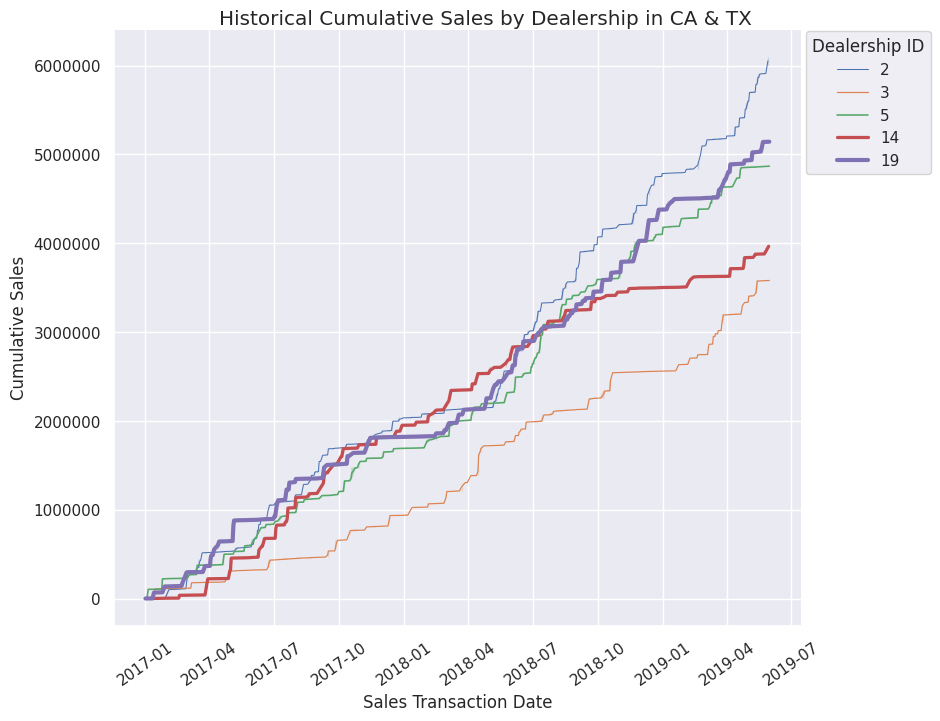

In [5]:
#2.3 visualization
import seaborn as sns
import matplotlib.pyplot as plt

#setting the seaborn style to darkgrid
sns.set(style="darkgrid")

#set the plot size
plt.figure(figsize=(10,10))

#creating a seaborn relplot
g=sns.relplot(data=cumulative_sales_bydealership, x="sales_transaction_date", y="cumulative_sales", hue="dealership_id",
              kind="line",size="dealership_id", palette="deep", legend="full", height=7, aspect=1.1)


#adding a title to the seaborn plot
g.fig.suptitle("Historical Cumulative Sales by Dealership in CA & TX")

#setting axis labels to appropirate titles respectively
g.set(ylabel="Cumulative Sales", 
       xlabel="Sales Transaction Date")

#setting legend title
g._legend.set_title('Dealership ID')

#setting additional legend parameters
sns.move_legend(g, "upper left", bbox_to_anchor=(0.85, 0.96), frameon=True)

#setting a rotation parameter for the x axis to avoid overlapping labels
g.set_xticklabels(rotation=35)

#setting style as plain to avoid scientific notation for cumulative sales
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#notes: line plot takes a few minutes to load

## Part 3: Product mix and sales

Create tables and visualizations to compare the proportion of scooter sales with total sales amount by state for sales from January 2017 to now. To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `state`,`prop_scooters`, and `total_sales`.  `prop_scooters` represents the proportion of scooter sales out of all sales made from January 2017 to now, `total_sales` represents the total sales amount from January 1, 2017 to now.  There should be one row for each state *and no more*.
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `prop_scoot`.
    
    
   3. Appropriately visualize the relationship between proportion of scooter sales and total sales *in a single plot*. Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, etc.). 

In [30]:
#3.1 select query
query_3 = """
WITH CTE AS( 
        SELECT c.state, CAST(SUM(s.sales_amount) AS DECIMAL (20,2)) AS total_sales,  
           SUM(CASE WHEN p.product_type='scooter' THEN 1  
           ELSE 0 END)::FLOAT/COUNT(*)  AS prop_scooters 
        FROM sales as s 
        INNER JOIN customers as c 
        ON s.customer_id= c.customer_id 
        INNER JOIN products as p 
        ON s.product_id = p.product_id 
        WHERE sales_transaction_date::DATE >= '2017-01-01' AND c.state IS NOT NULL 
        GROUP BY c.state 
        ORDER BY c.state, total_sales 
        ) 
    SELECT state, prop_scooters, total_sales
    FROM CTE
    order by total_sales DESC
"""

In [31]:
#3.2 create data frame
prop_scoot = pd.read_sql_query(query_3,engine)
prop_scoot

,state,prop_scooters,total_sales
0,CA,0.897876,15857815.99
1,TX,0.890336,15425788.00
2,FL,0.897781,10410607.25
3,NY,0.889960,9523439.42
4,PA,0.888342,5031834.85
5,DC,0.899833,4747799.88
6,VA,0.912917,4407463.98
7,OH,0.912593,4198514.12
8,GA,0.892336,4113195.33
9,MO,0.881607,4002390.99


<Figure size 1500x1000 with 0 Axes>

[Text(0, 0.5, 'Sales Amount'), Text(0.5, 0, 'State')]

[Text(0.5, 1.0, 'Proportion of Scooter Sales to Total Sales by State')]

[Text(0, 0, 'CA'),
 Text(1, 0, 'TX'),
 Text(2, 0, 'FL'),
 Text(3, 0, 'NY'),
 Text(4, 0, 'PA'),
 Text(5, 0, 'DC'),
 Text(6, 0, 'VA'),
 Text(7, 0, 'OH'),
 Text(8, 0, 'GA'),
 Text(9, 0, 'MO'),
 Text(10, 0, 'IL'),
 Text(11, 0, 'NC'),
 Text(12, 0, 'MN'),
 Text(13, 0, 'IN'),
 Text(14, 0, 'AL'),
 Text(15, 0, 'WA'),
 Text(16, 0, 'MI'),
 Text(17, 0, 'TN'),
 Text(18, 0, 'CO'),
 Text(19, 0, 'LA'),
 Text(20, 0, 'AZ'),
 Text(21, 0, 'KY'),
 Text(22, 0, 'MA'),
 Text(23, 0, 'WV'),
 Text(24, 0, 'OK'),
 Text(25, 0, 'KS'),
 Text(26, 0, 'WI'),
 Text(27, 0, 'CT'),
 Text(28, 0, 'NV'),
 Text(29, 0, 'MD'),
 Text(30, 0, 'SC'),
 Text(31, 0, 'UT'),
 Text(32, 0, 'AR'),
 Text(33, 0, 'OR'),
 Text(34, 0, 'ID'),
 Text(35, 0, 'MS'),
 Text(36, 0, 'NE'),
 Text(37, 0, 'IA'),
 Text(38, 0, 'AK'),
 Text(39, 0, 'NJ'),
 Text(40, 0, 'HI'),
 Text(41, 0, 'DE'),
 Text(42, 0, 'NM'),
 Text(43, 0, 'ND'),
 Text(44, 0, 'NH'),
 Text(45, 0, 'MT'),
 Text(46, 0, 'ME'),
 Text(47, 0, 'VT'),
 Text(48, 0, 'SD'),
 Text(49, 0, 'RI'),
 Text(50, 

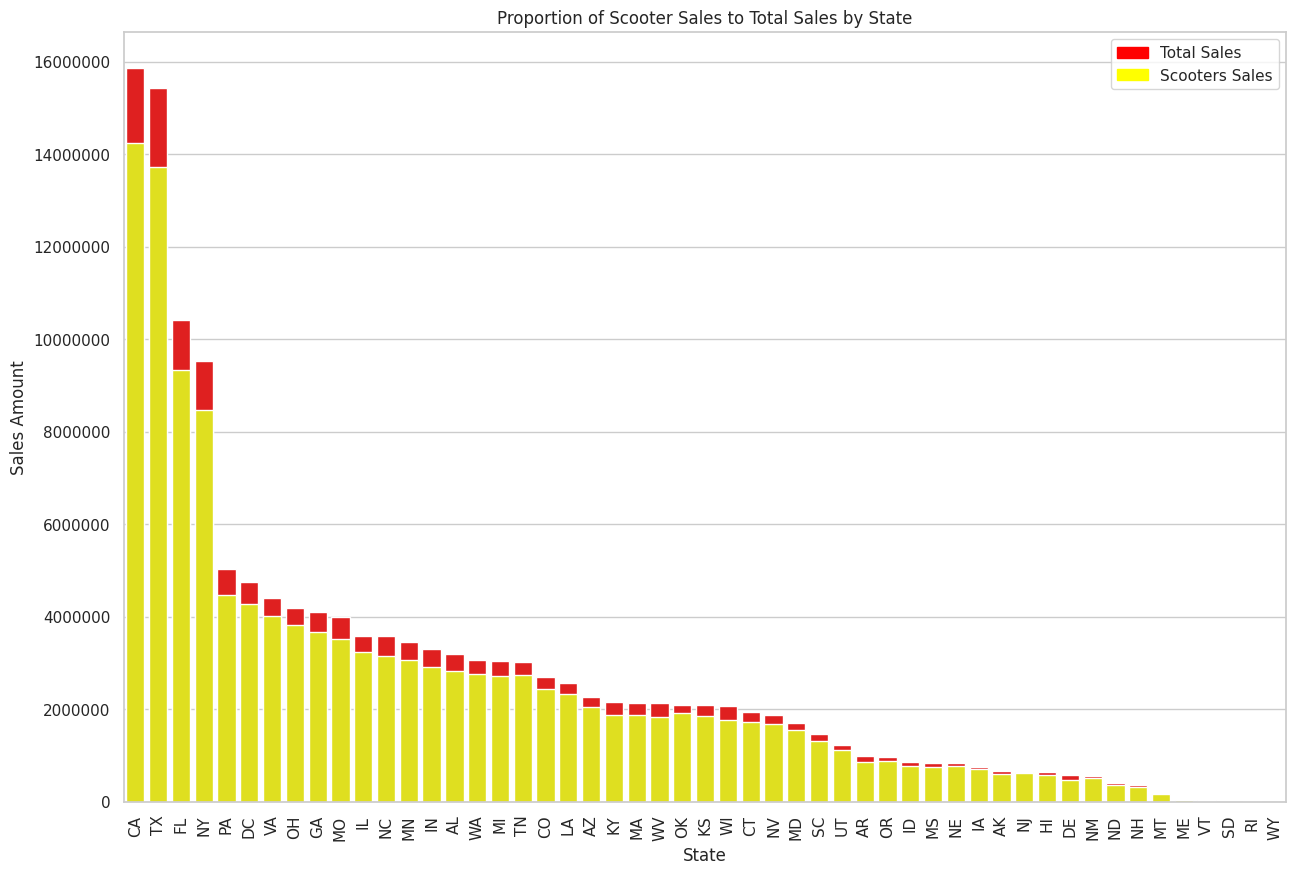

In [32]:
#3.3 visualization

import matplotlib.patches as mpatches

#setting the seaborn style to darkgrid
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))


bar_total= sns.barplot(x="state",  y="total_sales", data=prop_scoot, color='red')


prop_scoot["scooter_sales"] = prop_scoot["prop_scooters"] * prop_scoot["total_sales"]


bar_scooter = sns.barplot(x="state", y="scooter_sales", data=prop_scoot, ci=None,  color='yellow')


bar_total.set(ylabel='Sales Amount', xlabel='State')
bar_total.set(title='Proportion of Scooter Sales to Total Sales by State')


top_legend = mpatches.Patch(color='red', label='Total Sales')
bottom_legend = mpatches.Patch(color='yellow', label='Scooters Sales')
plt.legend(handles=[top_legend, bottom_legend])

#setting a rotation parameter for the x axis to avoid overlapping labels
bar_total.set_xticklabels(bar_total.get_xticklabels(),rotation=90)

#setting style as plain to avoid scientific notation for cumulative sales
bar_total.ticklabel_format(style='plain', axis='y')


plt.show()


## Part 4: Takeaways from the analysis

Provide your thoughts about the analysis above by answering the following questions in the blank markdown cells provided below. No code should be run for this section.


   1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
          
          
   2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
   
   
   3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that would influence your performance assessment. 
     
     
   4. (Part 3):  How would you describe the relationship between product mix (i.e. proportion of scooters sold) and total sales?  Be specific and cite specific elements of the visualization created in Part 3 to support your claims.

   
   5. (Part 3): What are some potential hypotheses as to why product mix and sales are related in the manner described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

### Part 4 Responses

For each of the following questions, answer in as much preciseness and clarity that you can. Refer back to the tables and plots that you have created to back up your answers if necessary. Answer each question in the cell below. You are NOT to code anything for this section. This is for you to reflect on the analysis developed in response to Parts 1-3.

1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

The high amount of sales in the top five states can be because of the following reasons: a. Higher income of the population increasing their purchasing power. b. More aggressive marketing stratgeies c. Low rate of excise tax  

Income, marketing, and rate of excise tax can be tested by creating the variables of income of the population, amount of money spent on marketing of the product, and the excise-taxt-rate. A linear regression can be used to regress these varaible on the sales amount as the dependent variable and rest of the three variables as independent variable. 



 2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

The low amount of sales in the top five states can be because of the following reasons: a. Lower income of the population increasing their purchasing power. b. Less aggressive marketing stratgeies c. High amount of excise tax Income, marketing, and the rate of excise tax can be tested by creating the variables of income of the population, amount of money spent on marketing of the product, and the excise-tax-rate. A linear regression can be used to regress these varaible on the sales amount as the dependent variable and rest of the three variables as independent variable.

3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that could influence your performance assessment. 


The historical performance of the dealerships visualized are growing. These are the top performing dealerships across two top performing states, California and Texas. As seen from the line plot, the dealership that has been performing relatively better than the others over the specified date range is the one with ID=1. The dealership with ID=19 was doing as good as ID=1 till the July of 2018, after that the clear winner is ID=1 with the highest cumulative sales as compared to others from July 2018. Among the 5 dealerships visualized, the one with ID=3 has been performing poorly as compared to others. While all the dealerships have been growing, the dealership with ID=14 has been somewhat constant from October 2018 with very slight increases from April 2019. It can also be seen that on July 2018, all the dealerships except ID=3 had a very similar amount of cumulative sales which may be due to various factors that affect the sales volumes in order for the dealerships to perform almost equally good. 

The figure is a seaborn line chart and is titled historic cumulative sales with cumulative sales on the y-axis and the sales transaction date on the x-axis. The date range of the plot is from January 2017 to July 2019. The plot has been grouped with different colors and sized based on the dealership parameter of the dataframe. It is a time series plot which provides us with the historical pattern of cumulative sales for the top performing dealerships over the date range specified.  

I would like to consider the state parameter to create two subplots using the col attribute on the state parameter and understand which state has the top performing dealership. Analyzing the dealerships based on the state will provide a clear and consice view of the historal sales trends. 

 4. (Part 3):  How would you describe the relationship between product mix (i.e. proportion of scooters sold) and total sales?  Be specific and cite specific elements of the visualization created in Part 3 to support your claims.


The plot added is a seaborn boxplot representing the proportion of scooter sales to the total amount of sales for different states of US. The x axis represents the states which are taken into consideration. The y axis represents the sales amount of these vehicles. The title of the plot is Proportion of scooter sales to total sales by state. 

 The sales of scooters and sales of all vehicles are differentiated by colors in the bar. The yellow shaded portion represents the sales amount of the scooter, and the red shaded portion represents the sales amount of the total number of vehicles. For example, In Texas, the total sales amount of scooters is 0.8 million and the total sales amount of vehicles is 13 million, this indicates the proportion of sales number of scooters to total sales amount of vehicles is 6.2% for Texas. 

It is clearly visible that the trend of the graph is declining, i.e., the state with the highest total sales amount is kept first (TX), followed by the state with the second-highest total sales amount of vehicle CA, and so on. Hence the trend of the graph is declining and there are 15 states taken into consideration in total. The state with the highest sales number of vehicles (13 million) is Texas and its proportion of scooter sales to the total amount of vehicle sales is 6.15%. The state with the least number of vehicles is Oregon (1 million) and its proportion of scooter sales to the total amount of vehicle sales is 10%. This clearly indicates that the descending order of states in the graph is followed only according to the total sales of vehicles and not according to the proportion of scooter sales to the total amount of vehicle sales. 

The top 5 states with the highest sales number of vehicles are TX (13 million), CA (11 million), IL (10.5 million), VA (8 million), and NJ (7.25 million). The proportion of scooter sales to the total amount of sales for the top 5 states with the highest sales number of vehicles is TX (6.5%), CA (7%), IL (6.8%), VA (6.7%), and NJ (6.8%). The highest proportion of scooter sales to the total amount of sales (10%) is for the state of Oregon. It is evident from the graph that the proportion of scooter sales to the total amount of sales for different states of the US is less than 10% for the given states. So, the proportion of scooter sales to the total amount of sales falls by nearly 6%. 

 5. (Part 3): What are some potential hypotheses as to why product mix and sales are related in the manner described in 5?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

The proportion of scooter sales to the total amount of sales for different states of the US is less than 10% for the given states which indicates that the scooter sales are less. One of the hypotheses is that customers find it convenient to use other vehicles in traffic when compared to scooters which results in lower scooter sales. The second hypothesis is that customers find other vehicles are more fuel efficient when compared to scooters which potentially resulted in lower sales rates of scooters. The third hypothesis is that customers are finding other vehicles safer when compared to scooters. 

In order to test these 3 different hypotheses, one of the potential techniques is to use paired t-test. For the first hypothesis, it will test the effect of convenience on the sales of scooters and other vehicles in a state. For the second hypothesis it will test the effect of fuel efficiency on the sales of scooters and other vehicles of a state. For the third hypothesis it will test the effect of safety on the sales of scooters and other vehicles of a state. 